### Initialization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import time
import json
import pprint
import config
import base64
import spotipy
import requests
import datetime
import seaborn as sns
import pandas as pd
from functools import lru_cache
from bs4 import BeautifulSoup
from urllib.parse import urlencode
from spotipy.oauth2 import SpotifyClientCredentials

from IPython.display import IFrame

import pandas as pd
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

import pickle

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.clientId,
                                                           client_secret= config.clientSecret))

In [3]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results["items"]
    while results["next"]:
        results = sp.next(results)
        tracks.extend(results["items"])
    return tracks

#### Functions

In [4]:
# selective call to function
class dataProfiling:

    def moreInfo(self, data):    
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. total values in the data
        print(f"No. of values in the dataset : {data.size:,}")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of missing values
        print(f"\nTotal null values : {data.isnull().sum().sum():,}")

        # counts no. of duplicates
        countDuplicates = data.duplicated().sum()
        print(f"Total duplicated rows : {format(countDuplicates, ',')}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / data.size) * 100

        # ratio for duplicated values
        dup_ratio = (countDuplicates / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
        print("\n")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumns(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print("\n")

    def nullGroupby(self, data, column):
        # displays no. of missing values per category
        print(f"\nTOTAL MISSING VALUES PER COLUMN FOR EACH UNIQUE VALUE :")        
        display(data.isna().groupby(data[column]).sum())

        print("\n")
    def visualizeNulls(self, data):
        # visualize missing values
        print(f"VISAULIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullFeature(self, data, column):
        # displays rows where missing values are found of a specific column 
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND OF A SPECIFIC FEATURE:")
        display(data[data[column].isna()])
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def allStats(self, data):
        # overall descerptive analysis (nuemrical and categorical)
        print(f"FULL DATA DESCRIPTIVE STATISTICS :")
        print("-" * 109)
        display(data.describe(include="all"))
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumns(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)

    def plotUniques(self, data):
        # for each numerical feature compute number of unique entries
        unique_values = data.select_dtypes(include="number").nunique().sort_values()

        # plot information with y-axis in log-scale
        unique_values.plot.bar(logy=False, title="No. of unique values per feature", figsize=(25,7))
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

# instance of the dataProfiling class
profiler = dataProfiling()

## experimental : *ground zero*

In [5]:
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# 
# lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'
# results = sp.artist_top_tracks(lz_uri)
# 
# for track in results['tracks'][:10]:
#     print('track    : ' + track['name'])
#     print('audio    : ' + track['preview_url'])
#     print('cover art: ' + track['album']['images'][0]['url'])
#     print()

In [6]:
# playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
# playlist_URI = playlist_link.split("/")[-1].split("?")[0]
# track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [7]:
# # extracting tracks' uri from the playlist
# topGlobal_uris = [x["track"]["uri"] for x in sp.playlist_tracks(topGlobal)["items"]]
# pprint.pprint(topGlobal_uris)
# 
# # no. of tracks in the playlist
# print(len(topGlobal_uris))

In [8]:
# uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
# 
# results = sp.artist_albums(uri, album_type='album')
# albums = results['items']
# 
# while results['next']:
#     results = sp.next(results)
#     albums.extend(results['items'])
# 
# for album in albums:
#     print(album['name'])

In [9]:
# for song in sp.playlist_tracks(topGlobal)["items"]:
#     track_uri = song["track"]["uri"]
#     results = sp.search(q=track_uri, market="US")
#     pprint.pprint(results)

In [10]:
# playlistTracks = get_playlist_tracks("spotify", topGlobal)
# pprint.pprint(playlistTracks)

In [11]:
# j = sp.playlist_tracks(topGlobal)["items"]
# for song in j:
#     pprint.pprint(song)

In [12]:
# # hold track details
# track_details = []

# # get first page of playlist tracks
# results = sp.playlist_tracks(topGlobal)

# # While there are more pages (tracks) to be fetched
# while results:

#     # extract track info from the current page of the playlist
#     for song in results["items"]:
        
#         track_dict = {}

#         # TRACK
#         track_dict["track_uri"] = song["track"]["uri"]
#         track_dict["track_id"] = song["track"]["id"]
#         track_dict["track_name"] = song["track"]["name"]
#         track_dict["track_pop"] = song["track"]["popularity"]
#         track_dict["track_duration"] = song["track"]["duration_ms"]
#         track_dict["track_number"] = song["track"]["disc_number"]
#         track_dict["is_explicit"] = song["track"]["explicit"]

#         # ARTISTS
#         # list to hold information for all artists of the track
#         artist_ids = []
#         artist_names = []
#         artist_uris = []
#         artist_pops = []
#         artist_genres = []

#         for artist in song["track"]["artists"]:
#             artist_ids.append(artist["id"])
#             artist_names.append(artist["name"])
#             artist_uris.append(artist["uri"])
#             artist_info = sp.artist(artist["uri"])
#             artist_pops.append(artist_info["popularity"])
#             artist_genres.append(artist_info["genres"])

#         track_dict["artist_ids"] = artist_ids
#         track_dict["artist_names"] = artist_names
#         track_dict["artist_uris"] = artist_uris
#         track_dict["artist_pops"] = artist_pops
#         track_dict["artist_genres"] = artist_genres

#         # ALBUM
#         track_dict["album_name"] = song["track"]["album"]["name"]
#         track_dict["album_id"] = song["track"]["album"]["id"]
#         track_dict["album_type"] = song["track"]["album"]["album_type"]
#         track_dict["album_release"] = song["track"]["album"]["release_date"]
#         track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#         track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#         # AUDIO FEATURES
#         audio_features = sp.audio_features(track_dict["track_id"])[0]  # get the first (and only) item
#         track_dict.update(audio_features)  # add the audio features to the track dictionary

#         # append the track_dict to the list
#         track_details.append(track_dict)

#     # get next page of tracks
#     results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# x = pd.DataFrame(track_details)
# x

In [13]:
# j = sp.playlist_tracks(topGlobal)["items"]
# for song in j:
#     pprint.pprint(song)

In [14]:
# for playlist_name, playlist_id in playlists.items():
#     print(f"Genres for playlist: {playlist_name}")
#     # Fetching playlist data
#     playlist = sp.playlist(playlist_id)
#     # Fetching tracks in the playlist
#     tracks = playlist['tracks']['items']
#     for track in tracks:
#         if track['track']['artists']:
#             # Fetching artist data for each track
#             artist = sp.artist(track['track']['artists'][0]['uri'])
#             # The genres associated with the artist
#             genres = artist['genres']
#             print(f"Track: {track['track']['name']}, Artist: {track['track']['artists'][0]['name']}, Genres: {genres}")
#         else:
#             print(f"Track: {track['track']['name']} has no associated artist.")
#     print("\n")

In [15]:
# topGlobal = "37i9dQZEVXbNG2KDcFcKOF"
# playlist = sp.user_playlist_tracks("spotify", topGlobal)
# pprint.pprint(playlist)
  
# print(list(playlist.keys())) # Let's look at items and total:
# print("Total number of songs in the playlist: ",playlist["total"]) #  Let's check items:

In [16]:
# topGlobal = "37i9dQZEVXbNG2KDcFcKOF"
# playlist = sp.user_playlist_tracks("spotify", topGlobal)
# pprint.pprint(playlist)
  
# print(list(playlist.keys())) # Let's look at items and total:
# print("Total number of songs in the playlist: ",playlist["total"]) #  Let's check items:

In [17]:
# pprint.pprint(sp.search(q="O Stella"))

In [18]:
# # Artist's URI
# artist_uri = "5YGY8feqx7naU7z4HrwZM6"

# # Fetching artist data
# artist = sp.artist(artist_uri)

# # The genres associated with the artist
# genres = artist['genres']

# print(genres)

In [19]:
# topGlobal = "37i9dQZEVXbNG2KDcFcKOF"
# playlist = sp.user_playlist_tracks("spotify", topGlobal)
# # pprint.pprint(playlist)

# # list to hold track details
# track_details = []

# # first page of playlist tracks
# results = sp.playlist_tracks(topGlobal)

# # While there are more pages (tracks) to be fetched
# while results:

#     # extract track info from the current page of the playlist
#     for song in results["items"]:
        
#         track_dict = {}

#         # TRACK
#         track_dict["track_uri"] = song["track"]["uri"]
#         track_dict["track_id"] = song["track"]["id"]
#         track_dict["track_name"] = song["track"]["name"]
#         track_dict["track_pop"] = song["track"]["popularity"]
#         track_dict["track_duration"] = song["track"]["duration_ms"]
#         track_dict["track_number"] = song["track"]["disc_number"]
#         track_dict["is_explicit"] = song["track"]["explicit"]

#         # ARTIST
#         artist_uri = song["track"]["artists"][0]["uri"]
#         artist_info = sp.artist(artist_uri)
#         track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#         track_dict["artist_name"] = song["track"]["artists"][0]["name"]
#         track_dict["artist_pop"] = artist_info["popularity"]
#         track_dict["artist_genres"] = artist_info["genres"]

#         # ALBUM
#         track_dict["album_name"] = song["track"]["album"]["name"]
#         track_dict["album_id"] = song["track"]["album"]["id"]
#         track_dict["album_type"] = song["track"]["album"]["album_type"]
#         track_dict["album_release"] = song["track"]["album"]["release_date"]
#         track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#         track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#         # AUDIO FEATURES
#         audio_features = sp.audio_features(track_dict["track_id"])[0]  # get the first (and only) item
#         track_dict.update(audio_features)  # add the audio features to the track dictionary

#         # append the track_dict to the list
#         track_details.append(track_dict)

#     # get next page of tracks
#     results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [20]:
# spotipyData["artist_genres"].loc[spotipyData["artist_name"] == "Yandel"]

In [21]:
# @`lru_cache`(maxsize=1000)
# def get_artist_info(artist_uri):
#     return sp.artist(artist_uri)

# @lru_cache(maxsize=1000)
# def get_audio_features(track_id):
#     return sp.audio_features(track_id)[0]

# # maximum number of retries for the API call
# max_retries = 5

# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     for i in range(max_retries):
#         try:
#             # first page of playlist tracks
#             results = sp.playlist_tracks(playlist_id)

#             # While there are more pages (tracks) to be fetched
#             while results:

#                 # extract track info from the current page of the playlist
#                 for song in results["items"]:
                    
#                     track_dict = {}

#                     # add the playlist name
#                     track_dict["playlist_name"] = playlist_name

#                     # TRACK
#                     track_dict["track_uri"] = song["track"]["uri"]
#                     track_dict["track_id"] = song["track"]["id"]
#                     track_dict["track_name"] = song["track"]["name"]
#                     track_dict["track_pop"] = song["track"]["popularity"]
#                     track_dict["track_duration"] = song["track"]["duration_ms"]
#                     track_dict["track_number"] = song["track"]["disc_number"]
#                     track_dict["is_explicit"] = song["track"]["explicit"]

#                     # ARTIST
#                     artist_uri = song["track"]["artists"][0]["uri"]
#                     track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#                     track_dict["artist_name"] = song["track"]["artists"][0]["name"]
                    
#                     artist_info = get_artist_info(artist_uri)
#                     track_dict["artist_pop"] = artist_info["popularity"]
#                     track_dict["artist_genres"] = artist_info["genres"]

#                     # ALBUM
#                     track_dict["album_name"] = song["track"]["album"]["name"]
#                     track_dict["album_id"] = song["track"]["album"]["id"]
#                     track_dict["album_type"] = song["track"]["album"]["album_type"]
#                     track_dict["album_release"] = song["track"]["album"]["release_date"]
#                     track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#                     track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#                     # AUDIO FEATURES
#                     audio_features = get_audio_features(track_dict["track_id"])  # get the first (and only) item
#                     track_dict.update(audio_features)  # add the audio features to the track dictionary

#                     # append the track_dict to the list
#                     track_details.append(track_dict)

#                 # get next page of tracks
#                 results = sp.next(results)

#             # break loop if the API call was successful
#             break

#         except spotipy.exceptions.SpotifyException as e:
#             # if exception is a rate limiting error (error 429), wait and retry
#             if e.http_status == 429:
#                 print("Rate limit exceeded. Waiting...")
#                 time.sleep(int(e.headers.get('Retry-After', 10)))
#             else:
#                 # if different kind of error, we will handle it differently, let's see..
#                 # or re-raise the exception if it's not something our script can recover from
#                 raise e

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [22]:
# @lru_cache(maxsize=1000)
# def get_artist_info(artist_uri):
#     return sp.artist(artist_uri)

# @lru_cache(maxsize=1000)
# def get_audio_features(track_id):
#     return sp.audio_features(track_id)[0]

# # maximum number of retries for the API call
# max_retries = 5

# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     for i in range(max_retries):
#         try:
#             # first page of playlist tracks
#             results = sp.playlist_tracks(playlist_id)

#             # While there are more pages (tracks) to be fetched
#             while results:

#                 # extract track info from the current page of the playlist
#                 for song in results["items"]:
                    
#                     track_dict = {}

#                     # add the playlist name
#                     track_dict["playlist_name"] = playlist_name

#                     # TRACK
#                     track_dict["track_uri"] = song["track"]["uri"]
#                     track_dict["track_id"] = song["track"]["id"]
#                     track_dict["track_name"] = song["track"]["name"]
#                     track_dict["track_pop"] = song["track"]["popularity"]
#                     track_dict["track_duration"] = song["track"]["duration_ms"]
#                     track_dict["track_number"] = song["track"]["disc_number"]
#                     track_dict["is_explicit"] = song["track"]["explicit"]

#                     # ARTIST
#                     artist_uri = song["track"]["artists"][0]["uri"]
#                     track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#                     track_dict["artist_name"] = song["track"]["artists"][0]["name"]
                    
#                     artist_info = get_artist_info(artist_uri)
#                     track_dict["artist_pop"] = artist_info["popularity"]
#                     track_dict["artist_genres"] = artist_info["genres"]

#                     # ALBUM
#                     track_dict["album_name"] = song["track"]["album"]["name"]
#                     track_dict["album_id"] = song["track"]["album"]["id"]
#                     track_dict["album_type"] = song["track"]["album"]["album_type"]
#                     track_dict["album_release"] = song["track"]["album"]["release_date"]
#                     track_dict["album_totalTracks"] = song["track"]["album"]["total_tracks"]
#                     track_dict["album_cover"] = song["track"]["album"]["images"][0]["url"]

#                     # AUDIO FEATURES
#                     audio_features = get_audio_features(track_dict["track_id"])  # get the first (and only) item
#                     track_dict.update(audio_features)  # add the audio features to the track dictionary

#                     # append the track_dict to the list
#                     track_details.append(track_dict)

#                 # get next page of tracks
#                 results = sp.next(results)

#             # break loop if the API call was successful
#             break

#         except spotipy.exceptions.SpotifyException as e:
#             # if exception is a rate limiting error (error 429), wait and retry
#             if e.http_status == 429:
#                 print("Rate limit exceeded. Waiting...")
#                 time.sleep(int(e.headers.get('Retry-After', 10)))
#             else:
#                 # if different kind of error, we will handle it differently, let's see..
#                 # or re-raise the exception if it's not something our script can recover from
#                 raise e

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [23]:
# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     # first page of playlist tracks
#     results = sp.playlist_tracks(playlist_id)

#     # While there are more pages (tracks) to be fetched
#     while results:

#         # extract track info from the current page of the playlist
#         for song in results["items"]:
            
#             track_dict = {}

#             # add the playlist name
#             track_dict["playlist_name"] = playlist_name

#             # TRACK
#             track_dict["trackURI"] = song["track"]["uri"]
#             track_dict["trackID"] = song["track"]["id"]
#             track_dict["trackName"] = song["track"]["name"]
#             track_dict["trackPopularity"] = song["track"]["popularity"]
#             track_dict["trackDuration"] = song["track"]["duration_ms"]
#             track_dict["trackNumber"] = song["track"]["disc_number"]
#             track_dict["isExplicit"] = song["track"]["explicit"]

#             # ARTIST
#             artist_uri = song["track"]["artists"][0]["uri"]
#             track_dict["artistID"] = song["track"]["artists"][0]["id"]
#             track_dict["artistName"] = song["track"]["artists"][0]["name"]
#             artist_info = sp.artist(artist_uri)
#             track_dict["asrtistPopularity"] = artist_info["popularity"]
#             track_dict["artistGenre"] = artist_info["genres"]

#             # ALBUM
#             track_dict["albumName"] = song["track"]["album"]["name"]
#             track_dict["albumID"] = song["track"]["album"]["id"]
#             track_dict["albumType"] = song["track"]["album"]["album_type"]
#             track_dict["releaseDate"] = song["track"]["album"]["release_date"]
#             track_dict["album_numberTracks"] = song["track"]["album"]["total_tracks"]
#             track_dict["albumCover"] = song["track"]["album"]["images"][0]["url"]

#             # AUDIO FEATURES
#             audio_features = sp.audio_features(track_dict["trackID"])[0]  # get the first (and only) item
#             track_dict.update(audio_features)  # add the audio features to the track dictionary

#             # append the track_dict to the list
#             track_details.append(track_dict)

#         # get next page of tracks
#         results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [24]:
# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     # first page of playlist tracks
#     results = sp.playlist_tracks(playlist_id)

#     # While there are more pages (tracks) to be fetched
#     while results:

#         # extract track info from the current page of the playlist
#         for song in results["items"]:
            
#             track_dict = {}

#             # add the playlist name
#             track_dict["playlist_name"] = playlist_name

#             # TRACK
#             track_dict["trackURI"] = song["track"]["uri"]

#             # ARTIST
#             artist_uri = song["track"]["artists"][0]["uri"]
#             if isinstance(artist_uri, str):  # check if artist_uri is a string
#                 track_dict["artist_id"] = song["track"]["artists"][0]["id"]
#                 track_dict["artist_name"] = song["track"]["artists"][0]["name"]

#                 artist_info = get_artist_info(artist_uri)  # call the function if artist_uri is a string
                
#                 track_dict["artist_pop"] = artist_info["popularity"]
#                 track_dict["artist_genres"] = artist_info["genres"]
#             else:
#                 print(f"Unexpected type for artist_uri: {type(artist_uri)}")

#             # append the track_dict to the list
#             track_details.append(track_dict)

#         # get next page of tracks
#         results = sp.next(results)

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

In [25]:
# # necessary imports
# import pickle
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import spotipy
# from spotipy.oauth2 import SpotifyOAuth

# # 1. Get the song name from the user as input
# song_name = input("Enter the name of the song: ")

# # 2. Play the input song in the music embed player
# # Assuming you have a method to play music using an embed player

# # 3. Get the audio features for this song from the Spotify API
# results = sp.search(q='track:' + song_name, type='track')
# track_id = results['tracks']['items'][0]['id']  # get track id
# audio_features = sp.audio_features(track_id)  # get audio features
# audio_df = pd.DataFrame(audio_features)  # create a DataFrame from the audio features

# # 4. Load the StandardScaler using Pickle and use it to scale the new song
# with open('scaler.pkl', 'rb') as f:
#     loaded_scaler = pickle.load(f)

# scaled_features = loaded_scaler.transform(audio_df)

# # 5. Load the KMeans model using Pickle and predict the cluster for the new song
# with open('kmeans.pickle', 'rb') as f:
#     loaded_kmeans = pickle.load(f)

# predicted_cluster = loaded_kmeans.predict(scaled_features)

# # 6. Return a random song from the same cluster
# clustered_songs = labeled[labeled['kmeans_cluster'] == predicted_cluster[0]]  # get all songs in the cluster
# random_song = clustered_songs.sample()  # get a random song from the cluster

# print("We recommend: ", random_song['song_name'])

# # 7. Play the recommended song using the built-in music player
# # Assuming we have a method to play music using an embed player

## data hunting

In [26]:
# playlists = {
#     "Who's That Girl": "0cLPcrlTcogy15QDfsQMWH",
#     "Eurovision 2023": "37i9dQZF1DWVCKO3xAlT1Q",
#     "Soft 50s": "37i9dQZF1DWXcg95telZlE",
#     "50s Party": "37i9dQZF1DWSwFS0Z6E1ep",
#     "All Out 50s": "37i9dQZF1DWSV3Tk4GO2fq",
#     "All Out 60s": "37i9dQZF1DXaKIA8E7WcJj",
#     "Années 60": "37i9dQZF1DX7Uol5MpckMS",
#     "All Out 70s": "37i9dQZF1DWTJ7xPn4vNaz",
#     "Best of Rock 1970s": "37i9dQZF1DXe9Gx5fVy1RT",
#     "Top Hits of 1970s": "37i9dQZF1DWXQyLTHGuTIz",
#     "Top Global 2023 - Weekly Charts": "37i9dQZEVXbNG2KDcFcKOF",
#     "All Out 2000s": "37i9dQZF1DX4o1oenSJRJd",
#     "Gold School (Hip Hop)": "37i9dQZF1DWVA1Gq4XHa6U",
#     "I Love My 90's Hip Hop": "37i9dQZF1DX186v583rmzp",
#     "Van life": "37i9dQZF1DX2ogDiL6nZJr",
#     "Good Vibes": "37i9dQZF1DWYBO1MoTDhZI",
#     "On the Road": "37i9dQZF1DX1S89tRXh2OS",
#     "Electro Chill": "37i9dQZF1DX9ND1QF5hZNF",
#     "Summer Tubes": "37i9dQZF1DWVf5yEjHHamn",
#     "Beach Vibes": "37i9dQZF1DX83I5je4W4rP",
#     "Summer Love": "37i9dQZF1DWY0BsMpCzERZ",
#     "Pop 2010": "37i9dQZF1DX8E06AbSENEw",
#     "Internet Rewind": "37i9dQZF1DWSPMbB1kcXmo",
#     "Equal K-Pop": "37i9dQZF1DX6Cy4Vr7Hu2y",
#     "Door Knockers - Classics from women in Hip hop": "37i9dQZF1DX9iGsUcr0Bpa",
#     "Baroque Classics": "37i9dQZF1DWXjj6kdiviS0",
#     "Romantische Klassik": "37i9dQZF1DWXQD9LUA72yg",
#     "Classical Essentials": "37i9dQZF1DWWEJlAGA9gs0",
#     "Opera Classics": "37i9dQZF1DWVfS4Cdd3PNf",
#     "Jazz Classics": "37i9dQZF1DXbITWG1ZJKYt",
#     "20+20+20+20 (80s)": "4Cw5GB3gHYT4UtRLxiafxt",
#     "Grrrrls": "2ZalQGM5fnEGFEAWFxnUP0",
#     "This Is Ratatat": "37i9dQZF1DZ06evO30oJa0",
#     "Top Throwbacks 2022": "37i9dQZF1DXdpy4ZQQMZKm",
#     "This Is Suede": "37i9dQZF1DZ06evO42t81I",
#     "Alternative 90s": "37i9dQZF1DXaLI8a395lse",
#     "Britpop etc": "37i9dQZF1DXaVgr4Tx5kRF",
#     "Légendes du Rock": "37i9dQZF1DWXTHBOfJ8aI7",
#     "I Love My 90s R&B": "37i9dQZF1DX6VDO8a6cQME",
#     "Flashback (Soul & Funk)": "37i9dQZF1DWXncK9DGeLh7",
#     "Sad Soul": "37i9dQZF1DXchlyaSeZp0q",
#     "Pop Chef": "37i9dQZF1DWXGPruVsfHKD",
#     "Funk & Soul Classics": "37i9dQZF1DWWvhKV4FBciw",
#     "Love Ballads": "37i9dQZF1DWYMvTygsLWlG",
#     "Sad Songs": "37i9dQZF1DX7qK8ma5wgG1",
#     "Indie Love Songs": "37i9dQZF1DWZIQpJDqCc10",
#     "Iconic Soundtracks": "37i9dQZF1DX1tz6EDao8it",
#     "Radio Ratatat": "37i9dQZF1E4qOvEr6iONpb",
#     "Radio Rangleklods": "37i9dQZF1E4oIf3a2eTRNV",
#     "Radio Björk": "37i9dQZF1E4Dy7CFyohSGG",
#     "Radio John Adams": "37i9dQZF1E4AbPpZmpoNtA",
#     "Radio Mark Morrison": "37i9dQZF1E4BjguqgbGnPZ",
#     "Radio U2": "37i9dQZF1E4lGTiNNgejAf",
#     "Radio Tash Sultana": "37i9dQZF1E4yvrFcE1Ebu2",
#     "Radio France Joli": "37i9dQZF1E4vvvLV0VoMm7",
#     "Radio Darondo": "37i9dQZF1E4nP8olYLWc7X",
#     "Radio Rodriguez": "37i9dQZF1E4oc4Q8MNZjh6",
#     "Radio Nina Simone": "37i9dQZF1E4nhi0B8j7Dp8",
#     "Radio Beyoncé": "37i9dQZF1E4B0yOyj0F53g",
#     "Radio Billie Eilish": "37i9dQZF1E4oee5QSbfqLN",
#     "Radio Honne": "37i9dQZF1E4uE7XrQEJTw4",
#     "Radio Nat King Cole": "37i9dQZF1E4vSoikuLfYSw",
#     "Radio Shigeru Umebayashi": "37i9dQZF1E4z4GftZr48PU",
#     "Radio Yo-Yo Ma": "37i9dQZF1E4jPjmMkFX0XY",
#     "Radio John Williams": "37i9dQZF1E4tbkEjnlwI4U",
#     "Radio Alicia Keys": "37i9dQZF1E4myiUG0z7BzX",
#     "Radio Patti Smith": "37i9dQZF1E4nIsD70hZdhC",
#     "Radio SIA": "37i9dQZF1E4oH2NG2UyvvJ",
#     "Radio Radiohead": "37i9dQZF1E4EgTnU7Hvt0A",
#     "Radio Taylor Swift": "37i9dQZF1E4AfEUiirXPyP",
#     "Radio Ariana Grande": "37i9dQZF1E4xstu1WxmJS4"}

In [27]:
# @lru_cache(maxsize=1000)
# def get_artist_info(artist_uri):
#     return sp.artist(artist_uri)

# @lru_cache(maxsize=1000)
# def get_audio_features(track_id):
#     return sp.audio_features(track_id)[0]

# # maximum number of retries for the API call
# max_retries = 5

# # list to hold track details
# track_details = []

# # iterate over each playlist in the dictionary
# for playlist_name, playlist_id in playlists.items():

#     for i in range(max_retries):
#         try:
#             # first page of playlist tracks
#             results = sp.playlist_tracks(playlist_id)

#             # While there are more pages (tracks) to be fetched
#             while results:

#                 # extract track info from the current page of the playlist
#                 for song in results["items"]:
                    
#                     track_dict = {}

#                     # add the playlist name
#                     track_dict["fromPlaylist"] = playlist_name

#                     # TRACK
#                     # track_dict["trackURI"] = song["track"]["uri"]
#                     # track_dict["trackID"] = song["track"]["id"]
#                     track_dict["trackName"] = song["track"]["name"]
#                     track_dict["trackPopularity"] = song["track"]["popularity"]
#                     # track_dict["trackDuration"] = song["track"]["duration_ms"]
#                     track_dict["trackNumber"] = song["track"]["disc_number"]
#                     track_dict["isExplicit"] = song["track"]["explicit"]

#                     # ARTIST
#                     artist_uri = song["track"]["artists"][0]["uri"]
#                     if isinstance(artist_uri, str):  # check if artist_uri is a string
#                         track_dict["artistID"] = song["track"]["artists"][0]["id"]
#                         track_dict["artistName"] = song["track"]["artists"][0]["name"]
        
#                         artist_info = get_artist_info(artist_uri)  # call the function if artist_uri is a string
                        
#                         track_dict["artistPop"] = artist_info["popularity"]
#                         track_dict["artistGenre"] = artist_info["genres"][0] if artist_info["genres"] else None

#                     else:
#                         print(f"Unexpected type for artist_uri: {type(artist_uri)}")

#                     # ALBUM
#                     track_dict["albumName"] = song["track"]["album"]["name"]
#                     track_dict["albumID"] = song["track"]["album"]["id"]
#                     track_dict["albumType"] = song["track"]["album"]["album_type"]
#                     release_date = song["track"]["album"]["release_date"]
#                     if release_date is not None:
#                         track_dict["releaseDate"] = pd.to_datetime(release_date).year
#                     else:
#                         track_dict["releaseDate"] = None
#                     track_dict["album_nTracks"] = song["track"]["album"].get("total_tracks", None)
#                     album_images = song["track"]["album"]["images"]
#                     if album_images:
#                         track_dict["albumCover"] = album_images[0]["url"]
#                     else:
#                         track_dict["albumCover"] = None

#                     # AUDIO FEATURES
#                     track_id = song["track"]["id"] # track_dict["trackID"]
#                     if track_id is not None:
#                         audio_features = get_audio_features(track_id)
#                         track_dict.update(audio_features)
#                     else:
#                         print(f"Unexpected type for trackID: {type(track_id)}")

#                     # append the track_dict to the list
#                     track_details.append(track_dict)

#                 # get next page of tracks
#                 results = sp.next(results)

#             # break loop if the API call was successful
#             break

#         except spotipy.exceptions.SpotifyException as e:
#             # if exception is a rate limiting error (error 429), wait and retry
#             if e.http_status == 429:
#                 print("Rate limit exceeded. Waiting...")
#                 time.sleep(int(e.headers.get("Retry-After", 10)))
#             else:
#                 # if different kind of error, we will handle it differently, let's see..
#                 # or re-raise the exception if it's not something our script can recover from
#                 raise e

# # convert the list of dictionaries to a DataFrame
# spotipyData = pd.DataFrame(track_details)
# spotipyData

## data profiling

### to work on later

In [28]:
# indexes_to_delete = [501, 1287, 1410, 832, 676, 992, 1007, 1041, 771, 775, 1243, 798, 962, 977, 934, 753, 779, 1219, 611, 567, 765, 758, 1502, 928, 1023, 1025, 582, 769, 1245,
#                      822, 1038, 1479, 980, 881, 974, 1009, 1477, 981, 542, 1480, 935, 1206, 1037]
# data = data.drop(indexes_to_delete).copy()

In [29]:
# data[["fromPlaylist", "trackID", "trackName", "releaseDate"]].loc[data.duplicated(["trackID", "trackName"], keep=False)].sort_values(by="trackID").head(50)

In [30]:
# data[data.duplicated(["trackID", "trackName"], keep=False)].count()

### as for now..

```python
# use these methods to analyze the data
profiler.moreInfo(data)
profiler.valueCounts(data)
profiler.nullColumns(data)
profiler.nullGroupby(data, column)
profiler.visualizeNulls(data)
profiler.nullFeature(data, column)
profiler.nullData(data)
profiler.descriptiveData(data)
profiler.nonNumericStats(data)
profiler.uniqueColumns(data)
profiler.plotUniques(data)
```

In [31]:
# spotipyData["fromPlaylist"].nunique()

In [32]:
# databackup = spotipyData.copy()
# # databackup.to_csv("databackup.csv")

In [33]:
# profiler.nullColumns(spotipyData)

In [34]:
# dataBackup[(databackup["fromPlaylist"] == "Last Century 50s-80s") & (databackup["id"].isnull())]

In [35]:
# profiler.nullData(spotipyData)

In [36]:
# profiler.moreInfo(spotipyData)

In [37]:
# # spotipyData = spotipyData.dropna(subset=["danceability"])
# spotipyData = spotipyData.drop_duplicates(subset="id")

In [38]:
# profiler.nonNumericStats(spotipyData)

In [39]:
# spotipyData.to_csv("spotipyData.csv")

## data preparation

In [50]:
# QUEST 1
# Load the Pandas data frame songs of the audio features (at least 1000 songs as different as possible)
data = pd.read_csv("spotipyData.csv").iloc[:, 1:]
noGenre = data.copy()

data.head()

,fromPlaylist,trackName,trackPopularity,trackNumber,isExplicit,artistID,artistName,artistPop,artistGenre,albumName,albumID,albumType,releaseDate,album_nTracks,albumCover,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Who's That Girl,Violet,64,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.287,0.780,7,-6.493,1,0.0469,0.04900,0.000037,0.184,0.3830,167.278,audio_features,6CHENx8iqzMwavTIz8s0gm,spotify:track:6CHENx8iqzMwavTIz8s0gm,https://api.spotify.com/v1/tracks/6CHENx8iqzMw...,https://api.spotify.com/v1/audio-analysis/6CHE...,204933,4
1,Who's That Girl,Miss World,54,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.331,0.722,7,-8.461,1,0.0408,0.00204,0.000053,0.256,0.3490,125.575,audio_features,3yMFBuIdPBdJkkzaPBDjKY,spotify:track:3yMFBuIdPBdJkkzaPBDjKY,https://api.spotify.com/v1/tracks/3yMFBuIdPBdJ...,https://api.spotify.com/v1/audio-analysis/3yMF...,180067,4
2,Who's That Girl,Doll Parts,61,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.245,0.542,7,-7.159,1,0.0324,0.14700,0.000004,0.102,0.3650,204.824,audio_features,49t1GWE6ZiEoBgN92oMDdM,spotify:track:49t1GWE6ZiEoBgN92oMDdM,https://api.spotify.com/v1/tracks/49t1GWE6ZiEo...,https://api.spotify.com/v1/audio-analysis/49t1...,211960,4
3,Who's That Girl,Rock Star,47,1,True,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.308,0.868,4,-6.440,1,0.1440,0.00514,0.000045,0.270,0.2500,125.782,audio_features,72xpgWWuEyLWFFTIKnrAbZ,spotify:track:72xpgWWuEyLWFFTIKnrAbZ,https://api.spotify.com/v1/tracks/72xpgWWuEyLW...,https://api.spotify.com/v1/audio-analysis/72xp...,162200,4
4,Who's That Girl,Lark,0,1,False,6mKqFxGMS5TGDZI3XkT5Rt,Angel Olsen,55,alternative americana,All Mirrors,0RedX0LZkGUFoRwFntAaI0,album,2019,11,https://i.scdn.co/image/ab67616d0000b2732b31fc...,0.447,0.560,7,-8.360,1,0.0316,0.00311,0.099100,0.220,0.0422,98.986,audio_features,13rEyddPoVpxXWWv2aTjqo,spotify:track:13rEyddPoVpxXWWv2aTjqo,https://api.spotify.com/v1/tracks/13rEyddPoVpx...,https://api.spotify.com/v1/audio-analysis/13rE...,378827,4


In [51]:
# QUEST 2
# Standardize the data using Standardscaler
toNormalize = ["trackPopularity",
                  "isExplicit",
                  "artistPop",
                  "releaseDate",
                  "danceability",
                  "energy",
                  "key",
                  "loudness",
                  "mode",
                  "speechiness",
                  "acousticness",
                  "instrumentalness",
                  "liveness",
                  "valence",
                  "tempo",
                  "duration_ms",
                  "time_signature"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(noGenre[toNormalize])

# QUEST 3
# Save the scaler for future use on the new user input song, using Pickle
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler, f)

# store into a dataframe
normalizedFeatures = pd.DataFrame(X_normalized, columns=toNormalize)

# add identifier
normalizedFeatures["identifier"] = normalizedFeatures.index
normalizedFeatures.index = normalizedFeatures["identifier"]
del normalizedFeatures["identifier"]
normalizedFeatures.head()

,trackPopularity,isExplicit,artistPop,releaseDate,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
identifier,,,,,,,,,,,,,,,,,
0,0.373336,-0.316597,-0.074351,-0.293910,-1.362864,0.991102,0.488268,0.643888,0.78097,-0.307340,-1.000934,-0.524031,0.109947,-0.344239,1.768678,-0.388548,0.279106
1,-0.131268,-0.316597,-0.074351,-0.293910,-1.136253,0.770125,0.488268,0.330638,0.78097,-0.396622,-1.132584,-0.523977,0.648254,-0.467999,0.332304,-0.638007,0.279106
2,0.221955,-0.316597,-0.074351,-0.293910,-1.579174,0.084333,0.488268,0.537880,0.78097,-0.519568,-0.726196,-0.524138,-0.503124,-0.409759,3.061873,-0.318052,0.279106
3,-0.484490,3.158590,-0.074351,-0.293910,-1.254709,1.326379,-0.349042,0.652324,0.78097,1.113853,-1.123893,-0.524004,0.752925,-0.828360,0.339434,-0.817252,0.279106
4,-2.856125,-0.316597,-0.388303,0.954621,-0.538826,0.152912,0.488268,0.346715,0.78097,-0.531277,-1.129584,-0.201427,0.379101,-1.584754,-0.583499,1.355984,0.279106


In [52]:
# NORMALIZATION
# Let's check whether the normalized data has a mean of zero and a standard deviation of one.
np.mean(normalizedFeatures), np.std(normalizedFeatures)

(6.088870082713062e-17,
 trackPopularity     1.0
 isExplicit          1.0
 artistPop           1.0
 releaseDate         1.0
 danceability        1.0
 energy              1.0
 key                 1.0
 loudness            1.0
 mode                1.0
 speechiness         1.0
 acousticness        1.0
 instrumentalness    1.0
 liveness            1.0
 valence             1.0
 tempo               1.0
 duration_ms         1.0
 time_signature      1.0
 dtype: float64)

In [53]:
noGenre["identifier"] = noGenre.index
noGenre.index = noGenre["identifier"]
del noGenre["identifier"]

noGenre["identifier"] = noGenre.index
noGenre.reset_index(drop=True, inplace=True)
noGenre.head()

,fromPlaylist,trackName,trackPopularity,trackNumber,isExplicit,artistID,artistName,artistPop,artistGenre,albumName,albumID,albumType,releaseDate,album_nTracks,albumCover,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,Who's That Girl,Violet,64,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.287,0.780,7,-6.493,1,0.0469,0.04900,0.000037,0.184,0.3830,167.278,audio_features,6CHENx8iqzMwavTIz8s0gm,spotify:track:6CHENx8iqzMwavTIz8s0gm,https://api.spotify.com/v1/tracks/6CHENx8iqzMw...,https://api.spotify.com/v1/audio-analysis/6CHE...,204933,4,0
1,Who's That Girl,Miss World,54,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.331,0.722,7,-8.461,1,0.0408,0.00204,0.000053,0.256,0.3490,125.575,audio_features,3yMFBuIdPBdJkkzaPBDjKY,spotify:track:3yMFBuIdPBdJkkzaPBDjKY,https://api.spotify.com/v1/tracks/3yMFBuIdPBdJ...,https://api.spotify.com/v1/audio-analysis/3yMF...,180067,4,1
2,Who's That Girl,Doll Parts,61,1,False,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.245,0.542,7,-7.159,1,0.0324,0.14700,0.000004,0.102,0.3650,204.824,audio_features,49t1GWE6ZiEoBgN92oMDdM,spotify:track:49t1GWE6ZiEoBgN92oMDdM,https://api.spotify.com/v1/tracks/49t1GWE6ZiEo...,https://api.spotify.com/v1/audio-analysis/49t1...,211960,4,2
3,Who's That Girl,Rock Star,47,1,True,5SHQUMAmEK5KmuSb0aDvsn,Hole,60,alternative rock,Live Through This,2Rwf2nPYZQ9aIe4QXACTC7,album,1994,12,https://i.scdn.co/image/ab67616d0000b273be245e...,0.308,0.868,4,-6.440,1,0.1440,0.00514,0.000045,0.270,0.2500,125.782,audio_features,72xpgWWuEyLWFFTIKnrAbZ,spotify:track:72xpgWWuEyLWFFTIKnrAbZ,https://api.spotify.com/v1/tracks/72xpgWWuEyLW...,https://api.spotify.com/v1/audio-analysis/72xp...,162200,4,3
4,Who's That Girl,Lark,0,1,False,6mKqFxGMS5TGDZI3XkT5Rt,Angel Olsen,55,alternative americana,All Mirrors,0RedX0LZkGUFoRwFntAaI0,album,2019,11,https://i.scdn.co/image/ab67616d0000b2732b31fc...,0.447,0.560,7,-8.360,1,0.0316,0.00311,0.099100,0.220,0.0422,98.986,audio_features,13rEyddPoVpxXWWv2aTjqo,spotify:track:13rEyddPoVpxXWWv2aTjqo,https://api.spotify.com/v1/tracks/13rEyddPoVpx...,https://api.spotify.com/v1/audio-analysis/13rE...,378827,4,4


In [54]:
# QUEST 4 + 5 + 7 + 8
# Adjust k means cluster
# + Select the number of clusters k
# + Use the model with the best k,
# to assign each observation in your data frame to its cluster number,
# using model.predict (add cluster columns to the pandas data frame)
# + Save the model with the best k as your final model using pickle

# reducing isn't necesarry here since we already have standardized units

# clustering par K-means
kmeans = KMeans(n_clusters=30, n_init=10)
kmeans.fit(normalizedFeatures)

with open("kmeans.pickle", "wb") as f:
    pickle.dump(kmeans, f)

# group sorting
clusters = np.argsort(kmeans.labels_)

# show observations and groups
clustered = pd.DataFrame(normalizedFeatures.index[clusters], kmeans.labels_[clusters])
display(clustered.head())

# add cluster column
clustered["kmeans_cluster"] = clustered.index
clustered.reset_index(drop=True, inplace=True)
display(clustered.head())

# no. of clusters
display(clustered["kmeans_cluster"].unique())

# join noGenre dataset with clustered dataset
labeled = pd.merge(clustered, noGenre, on = "identifier")
display(labeled.head())

# keep cool columns for viewing and get essential track info
trackInfo = labeled[["id", "trackName", "artistName", "artistGenre", "isExplicit", "albumName", "album_nTracks", "releaseDate", "duration_ms", "fromPlaylist", "trackPopularity", "artistPop", "albumCover", "uri", "kmeans_cluster"]]
display(trackInfo.head())

# dataset to pickle
with open("trackInfo.pickle", "wb") as f:
    pickle.dump(trackInfo, f)

,identifier
0,2919
0,1384
0,4600
0,2245
0,766


,identifier,kmeans_cluster
0,2919,0
1,1384,0
2,4600,0
3,2245,0
4,766,0


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

,identifier,kmeans_cluster,fromPlaylist,trackName,trackPopularity,trackNumber,isExplicit,artistID,artistName,artistPop,artistGenre,albumName,albumID,albumType,releaseDate,album_nTracks,albumCover,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2919,0,This Is Ratatat,Outro,32,1,False,57dN52uHvrHOxijzpIgu3E,Ratatat,66,indietronica,Magnifique,5bFeGIVw5pGnLamK7eVSef,album,2015,14,https://i.scdn.co/image/ab67616d0000b27348f0ef...,0.715,0.747,5,-13.556,0,0.333,0.7700,0.542000,0.2750,0.522,117.718,audio_features,2eZ1PfpLUcnWlcUJGfAndN,spotify:track:2eZ1PfpLUcnWlcUJGfAndN,https://api.spotify.com/v1/tracks/2eZ1PfpLUcnW...,https://api.spotify.com/v1/audio-analysis/2eZ1...,35416,3
1,1384,0,All Out 2000s,Angel,78,1,False,5EvFsr3kj42KNv97ZEnqij,Shaggy,73,dance pop,Hot Shot,3MT88SSyxQGbqYXj4LVk3b,album,2000,15,https://i.scdn.co/image/ab67616d0000b2739449f9...,0.740,0.766,6,-2.939,1,0.178,0.1160,0.000000,0.0406,0.807,170.531,audio_features,7FDV5ELOJHCGLe52AnttEd,spotify:track:7FDV5ELOJHCGLe52AnttEd,https://api.spotify.com/v1/tracks/7FDV5ELOJHCG...,https://api.spotify.com/v1/audio-analysis/7FDV...,235133,4
2,4600,0,Radio SIA,Treat You Better,86,1,False,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,84,canadian pop,Illuminate,1ne2D0NxoGyZd31gAM4HNd,album,2017,13,https://i.scdn.co/image/ab67616d0000b2731376b4...,0.444,0.819,10,-4.078,0,0.341,0.1060,0.000000,0.1070,0.747,82.695,audio_features,3QGsuHI8jO1Rx4JWLUh9jd,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,https://api.spotify.com/v1/tracks/3QGsuHI8jO1R...,https://api.spotify.com/v1/audio-analysis/3QGs...,187973,4
3,2245,0,Door Knockers - Classics from women in Hip hop,Lost Ones,62,1,False,2Mu5NfyYm8n5iTomuKAEHl,Ms. Lauryn Hill,72,alternative r&b,The Miseducation of Lauryn Hill,1BZoqf8Zje5nGdwZhOjAtD,album,1998,16,https://i.scdn.co/image/ab67616d0000b273e08b12...,0.832,0.749,2,-6.129,1,0.370,0.0998,0.000004,0.0837,0.650,94.899,audio_features,71XhXay6rKPZCVAaDtFlSR,spotify:track:71XhXay6rKPZCVAaDtFlSR,https://api.spotify.com/v1/tracks/71XhXay6rKPZ...,https://api.spotify.com/v1/audio-analysis/71Xh...,333907,4
4,766,0,All Out 50s,The Book of Love,54,1,False,39aV9if9R4QuPZxrJsxc9a,The Monotones,38,doo-wop,Who Wrote The Book Of Love? [Digital Version],2Bpr0LzFjdDjBHKsT9JxOV,album,2006,14,https://i.scdn.co/image/ab67616d0000b273b9e90d...,0.428,0.594,10,-12.716,1,0.379,0.7340,0.000000,0.5670,0.556,198.670,audio_features,1N131UBLlYAUJNVpHOfEc1,spotify:track:1N131UBLlYAUJNVpHOfEc1,https://api.spotify.com/v1/tracks/1N131UBLlYAU...,https://api.spotify.com/v1/audio-analysis/1N13...,138298,4


,id,trackName,artistName,artistGenre,isExplicit,albumName,album_nTracks,releaseDate,duration_ms,fromPlaylist,trackPopularity,artistPop,albumCover,uri,kmeans_cluster
0,2eZ1PfpLUcnWlcUJGfAndN,Outro,Ratatat,indietronica,False,Magnifique,14,2015,35416,This Is Ratatat,32,66,https://i.scdn.co/image/ab67616d0000b27348f0ef...,spotify:track:2eZ1PfpLUcnWlcUJGfAndN,0
1,7FDV5ELOJHCGLe52AnttEd,Angel,Shaggy,dance pop,False,Hot Shot,15,2000,235133,All Out 2000s,78,73,https://i.scdn.co/image/ab67616d0000b2739449f9...,spotify:track:7FDV5ELOJHCGLe52AnttEd,0
2,3QGsuHI8jO1Rx4JWLUh9jd,Treat You Better,Shawn Mendes,canadian pop,False,Illuminate,13,2017,187973,Radio SIA,86,84,https://i.scdn.co/image/ab67616d0000b2731376b4...,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,0
3,71XhXay6rKPZCVAaDtFlSR,Lost Ones,Ms. Lauryn Hill,alternative r&b,False,The Miseducation of Lauryn Hill,16,1998,333907,Door Knockers - Classics from women in Hip hop,62,72,https://i.scdn.co/image/ab67616d0000b273e08b12...,spotify:track:71XhXay6rKPZCVAaDtFlSR,0
4,1N131UBLlYAUJNVpHOfEc1,The Book of Love,The Monotones,doo-wop,False,Who Wrote The Book Of Love? [Digital Version],14,2006,138298,All Out 50s,54,38,https://i.scdn.co/image/ab67616d0000b273b9e90d...,spotify:track:1N131UBLlYAUJNVpHOfEc1,0


Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means model with 24 clusters! 

Training a K-Means model with 25 clusters! 

Training a K-Means model with 26 clusters! 

Training a K-Me

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

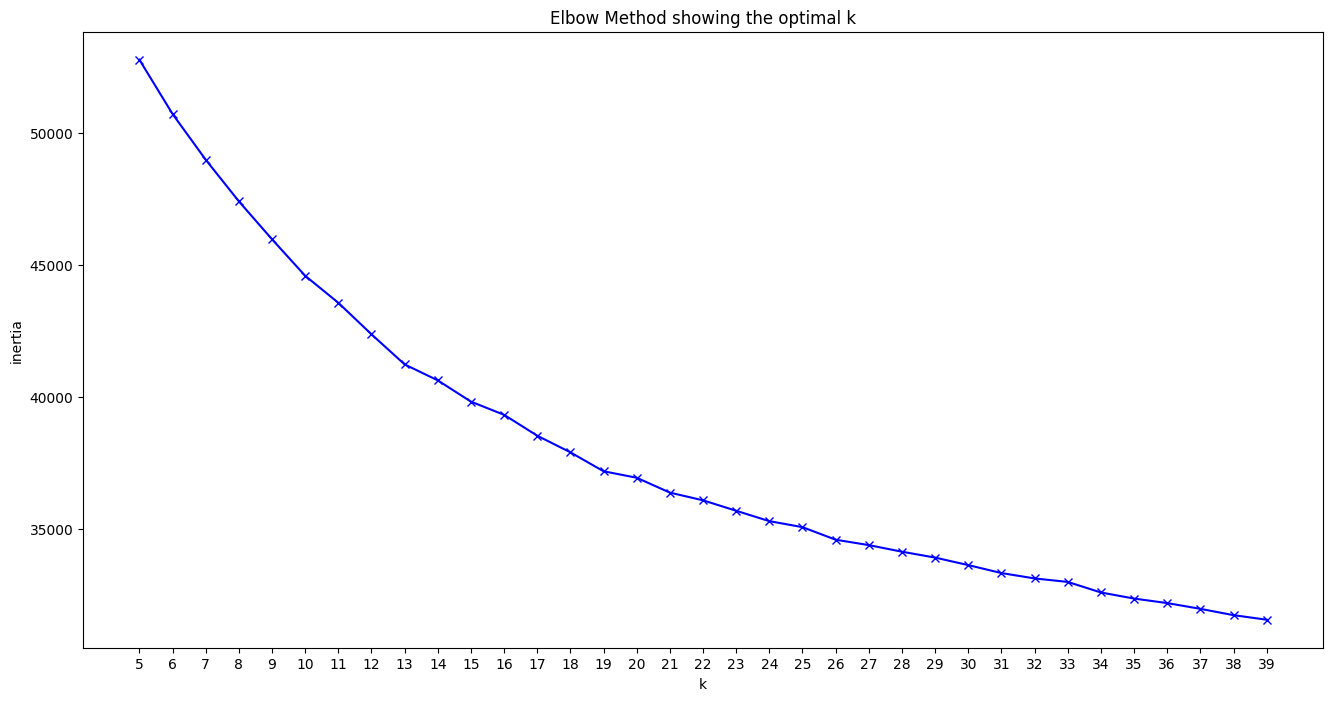

In [55]:
# QUEST 6
# Build the elbow graph to find the best k
K = range(5, 40) #range of the clusters
inertia = []

for k in K: #for every data in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(normalizedFeatures)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) #changing the scale
plt.title('Elbow Method showing the optimal k') 

In [56]:
trackInfo[trackInfo["kmeans_cluster"] == 8]

,id,trackName,artistName,artistGenre,isExplicit,albumName,album_nTracks,releaseDate,duration_ms,fromPlaylist,trackPopularity,artistPop,albumCover,uri,kmeans_cluster
1272,2jrcEZBE8umZsAFTOKE0F4,Berlin,Modeselektor,electronica,False,Monkeytown,11,2011,283080,Radio Ratatat,38,46,https://i.scdn.co/image/ab67616d0000b2738b5d10...,spotify:track:2jrcEZBE8umZsAFTOKE0F4,8
1273,70yszWsLJvNZuZwaHNMROf,PANDORA,MAVE:,k-pop girl group,False,PANDORA'S BOX,2,2023,196827,Equal K-Pop,76,57,https://i.scdn.co/image/ab67616d0000b2737eefbb...,spotify:track:70yszWsLJvNZuZwaHNMROf,8
1274,1V6XivQH2anhv8s2Bq7Fo5,Starcrazy (Remastered),Suede,britpop,False,Coming Up (Remastered),12,1996,213267,This Is Suede,27,51,https://i.scdn.co/image/ab67616d0000b27306aaab...,spotify:track:1V6XivQH2anhv8s2Bq7Fo5,8
1275,3JS3K4Kw0xnhDRsPG9kUph,Down,St. Vincent,art pop,False,Daddy's Home,14,2021,206427,Who's That Girl,40,62,https://i.scdn.co/image/ab67616d0000b273bbd975...,spotify:track:3JS3K4Kw0xnhDRsPG9kUph,8
1276,3Fzlg5r1IjhLk2qRw667od,Dancing in the Moonlight,Toploader,british alternative rock,False,Onka's Big Moka,12,2000,232693,All Out 2000s,79,62,https://i.scdn.co/image/ab67616d0000b273e16a65...,spotify:track:3Fzlg5r1IjhLk2qRw667od,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,3pSaOIP5KFRc5j1jMMvNzN,Like Kids,Suede,britpop,False,Night Thoughts,12,2016,216360,This Is Suede,28,51,https://i.scdn.co/image/ab67616d0000b273e0fffe...,spotify:track:3pSaOIP5KFRc5j1jMMvNzN,8
1399,6m59VvDUi0UQsB2eZ9wVbH,Poison,Bell Biv DeVoe,boy band,False,Poison,10,1990,261853,I Love My 90s R&B,72,55,https://i.scdn.co/image/ab67616d0000b2730ce911...,spotify:track:6m59VvDUi0UQsB2eZ9wVbH,8
1400,2qQpFbqqkLOGySgNK8wBXt,FANCY,TWICE,k-pop,False,FANCY YOU,6,2019,213880,Equal K-Pop,76,82,https://i.scdn.co/image/ab67616d0000b273ff7c2d...,spotify:track:2qQpFbqqkLOGySgNK8wBXt,8
1401,2bL2gyO6kBdLkNSkxXNh6x,Animals,Maroon 5,pop,False,V,12,2014,231013,Radio SIA,82,85,https://i.scdn.co/image/ab67616d0000b273442b53...,spotify:track:2bL2gyO6kBdLkNSkxXNh6x,8


In [57]:
from IPython.display import IFrame

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media")

play_song("64MHnMvyOiNJU9tmUOBjeV")

## recommender

If we were to load our scaler and then print it, it would look something like this:

```python
# Use the scaler from the pickle file
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

print(loaded_scaler)
```

The output would look something like this:
```python
StandardScaler()
```

The fact that it doesn't print the internal data of the scaler (*like the **means** and **standard deviations***) doesn't mean they aren't there. <br>
This is just the standard way that sklearn prints its objects. <br>
We can access the mean and standard deviation of each feature with the `mean_` and `scale_` attributes, respectively:

```python
print(loaded_scaler.mean_)  # prints the means of each feature
print(loaded_scaler.scale_)  # prints the standard deviations of each feature
```

`loaded_scaler` is now a `StandardScaler` instance with the same state as scaler when it was pickled. <br>
We can use it to transform new data in the same way as the original data:

```python
inputNormalized = loaded_scaler.transform(newData)
```

Remember, pickle is not secure against erroneous or maliciously constructed data. <br>
Never unpickle data received from an untrusted or unauthenticated source.

We can load this model again with these lines:

```python
with open("kmeans.pickle", "rb") as f:
    loaded_kmeans = pickle.load(f)
```

Now `loaded_kmeans` is a **KMeans** model that's in the same state as `kmeans` was when it was pickled. <br>
We can use it to predict the cluster of new data points:

```python
inputCluster = loaded_kmeans.predict(newData)
```

In conclusion, the `KMeans` model, including the number of clusters and the cluster centers, is what's saved in the pickle file. <br>
This model can be used to assign new data points to the existing clusters.

In [82]:
# 1ST PART: PLUG AND PLAY

# embedded player
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
                  width="320",
                  height="80",
                  frameborder="0",
                  allowtransparency="true",
                  allow="encrypted-media")

try:
    # 1. get song name from the user as input
    song_name = input("Enter the name of the song: ")
    if not song_name:
        raise ValueError("Song name cannot be empty")

    # perform search on Spotify for the song
    results = sp.search(q="track:" + song_name, type="track")
    if not results["tracks"]["items"]:
        raise ValueError(f"No track found with the name {song_name}")
    
    # extract track ID of the first result
    track_id = results["tracks"]["items"][0]["id"]

    # 2. play input song in the music embed player
    display(play_song(track_id))
    
except ValueError as e:
    print("Error: ", str(e))

In [84]:
# 2ND PART: RECOMMEND AND PLAY

# load track_id from the file
with open("track_id.txt", "r") as file:
    track_id = file.read()

try:
    # 3. get audio features for this song from the Spotify API
    audio_features = sp.audio_features(track_id)
    if not audio_features:
        raise ValueError(f"No audio features found for the track {song_name}")
    
    # get additional features
    results = sp.track(track_id)
    
    trackPopularity = results['popularity']
    isExplicit = results['explicit']
    artist_id = results['artists'][0]['id']
    artistPop = sp.artist(artist_id)['popularity']
    releaseDate = results['album']['release_date']
    
    # create a DataFrame from audio_features (which is a list of dictionaries)
    audioFeatures = pd.DataFrame(audio_features)
    
    # add the additional features to the DataFrame
    audioFeatures['trackPopularity'] = trackPopularity
    audioFeatures['isExplicit'] = isExplicit
    audioFeatures['artistPop'] = artistPop
    audioFeatures['releaseDate'] = releaseDate

    # select only the columns that were used in the original data
    features = ["trackPopularity", "isExplicit", "artistPop", "releaseDate", "danceability",
                  "energy", "key", "loudness", "mode", "speechiness", "acousticness",
                  "instrumentalness", "liveness", "valence", "tempo", "duration_ms",
                  "time_signature"]
    
    audioFeatures = audioFeatures[features]
    
    # 4. load StandardScaler using Pickle and use it to scale the new song
    with open("scaler.pickle", "rb") as f:
        loaded_scaler = pickle.load(f)
    scaled_features = loaded_scaler.transform(audioFeatures)

    # 5. load KMeans model using Pickle and predict the cluster for the new song
    with open("kmeans.pickle", "rb") as f:
        loaded_kmeans = pickle.load(f)
    predicted_cluster = loaded_kmeans.predict(scaled_features)

    # 6. return random song from the same cluster
    clustered_songs = labeled[labeled["kmeans_cluster"] == predicted_cluster[0]]
    if clustered_songs.empty:
        raise ValueError(f"No songs found in the same cluster as {song_name}")
    random_song = clustered_songs.sample()

    print("We recommend: ", random_song["song_name"])

    # 7. play recommended song using the built-in music player
    recommended_track_id = random_song["id"].values[0] # assuming "id" is the column name for track id
    display(play_song(recommended_track_id))
    
except ValueError as e:
    print("Error: ", str(e))
except FileNotFoundError:
    print("Error: Required file not found")
except pickle.UnpicklingError:
    print("Error: Failed to load data from pickle file")


/Users/katrinajmd/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


KeyError: 'song_name'

In [80]:
try:
    # Fetch additional attributes
    res = sp.search(q="track:" + song_name, type="track")

    # Track popularity
    track_popularity = res['tracks']['items'][0]['popularity']

    # Track explicit
    track_explicit = res['tracks']['items'][0]['explicit']

    # Artist popularity
    artist_id = res['tracks']['items'][0]['artists'][0]['id']
    artist_popularity = sp.artist(artist_id)['popularity']

    # Release date
    release_date = res['tracks']['items'][0]['album']['release_date']

    # 3. get audio features for this song from the Spotify API
    audio_features = sp.audio_features(track_id)
    if not audio_features:
        raise ValueError(f"No audio features found for the track {song_name}")

    # Add the new attributes to the audio_features dictionary
    audio_features[0]['trackPopularity'] = track_popularity
    audio_features[0]['isExplicit'] = track_explicit
    audio_features[0]['artistPop'] = artist_popularity
    audio_features[0]['releaseDate'] = release_date

    # 4. load StandardScaler using Pickle and use it to scale the new song
    with open('scaler.pickle', 'rb') as f:
        loaded_scaler = pickle.load(f)
    scaled_features = loaded_scaler.transform(pd.DataFrame(audio_features))

    # 5. load KMeans model using Pickle and predict the cluster for the new song
    with open('kmeans.pickle', 'rb') as f:
        loaded_kmeans = pickle.load(f)
    predicted_cluster = loaded_kmeans.predict(scaled_features)

    # 6. return random song from the same cluster
    clustered_songs = labeled[labeled['kmeans_cluster'] == predicted_cluster[0]]
    if clustered_songs.empty:
        raise ValueError(f"No songs found in the same cluster as {song_name}")
    random_song = clustered_songs.sample()

    print("We recommend: ", random_song['song_name'])

    # 7. play recommended song using the built-in music player
    recommended_track_id = random_song["id"].values[0] # assuming "id" is the column name for track id
    display(play_song(recommended_track_id))
    
except ValueError as e:
    print("Error: ", str(e))
except FileNotFoundError:
    print("Error: Required file not found")
except pickle.UnpicklingError:
    print("Error: Failed to load data from pickle file")

Error:  The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- analysis_url
- id
- track_href
- type
- uri



In [81]:
X_normalized

array([[ 0.37333564, -0.31659698, -0.07435108, ...,  1.76867795,
        -0.38854777,  0.27910594],
       [-0.13126755, -0.31659698, -0.07435108, ...,  0.33230397,
        -0.63800734,  0.27910594],
       [ 0.22195468, -0.31659698, -0.07435108, ...,  3.06187262,
        -0.31805181,  0.27910594],
       ...,
       [ 1.02931979,  3.15858987,  1.74657031, ...,  1.10992225,
        -0.71786329,  0.27910594],
       [ 1.23116107, -0.31659698,  0.61634324, ...,  1.17453721,
        -0.4441861 ,  0.27910594],
       [-0.98909298, -0.31659698, -1.07899736, ..., -0.61742569,
         0.24227415,  0.27910594]])

In [66]:
res = sp.search(q="track:" + "7 rings", type="track")
pprint.pprint(res)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3A7+rings&type=track&offset=0&limit=10',
            'items': [{'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
                                              'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
                                              'id': '66CXWjxzNUsdJxJ2JdwvnR',
                                              'name': 'Ariana Grande',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
                                 'available_markets': ['AD',
                                                       'AE',
                                                       'AG',
                                                       'AL',
                                  

In [69]:
res["tracks"]["items"][0]["popularity"]

86

In [73]:
artist_uri = res["tracks"]["items"]["artists"][0]["uri"]
artist_uri

TypeError: list indices must be integers or slices, not str

In [ ]:
artist_info = get_artist_info(artist_uri)
